In [17]:
# /home/mbd1234/data/yolo_set_3/images/train의 이미지들과
# /home/mbd1234/data/yolo_set_3/annotations/instances_train.json의 Instance Segmentation 데이터를 이용해서
# albumentations를 활용한 이미지 증강(Augmentation)을 해볼거야.
# 우선, COCO format annotation을 불러오고 이미지 경로와 annotation 정보를 확인해보자.

import os
import json
from pprint import pprint
import albumentations as A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib



In [18]:

img_dir = "/home/mbd1234/data/yolo_set_3/images/val"
ann_file = "/home/mbd1234/data/yolo_set_3/annotations/instances_val.json"

with open(ann_file, "r") as f:
    coco = json.load(f)

# 이미지 파일 이름 목록을 가져오기
image_id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

# 첫번째 이미지 정보 예시 출력
print("샘플 이미지 file_name:", coco["images"][0]["file_name"])
print("샘플 이미지 id:", coco["images"][0]["id"])

# 해당 이미지에 연결된 annotation들 확인
first_img_id = coco["images"][0]["id"]
anns_for_img = [ann for ann in coco["annotations"] if ann["image_id"] == first_img_id]

print("해당 이미지에 연결된 annotation (예시):")
pprint(anns_for_img[0])

# 이제 데이터 준비가 끝났으니 albumentations로 증강을 해볼 수 있어!

샘플 이미지 file_name: Cell Image (732).jpg
샘플 이미지 id: 1
해당 이미지에 연결된 annotation (예시):
{'area': 19.0,
 'bbox': [518.0, 197.0, 5.0, 4.0],
 'category_id': 1,
 'id': 1,
 'image_id': 1,
 'iscrowd': 0,
 'segmentation': [[518.0,
                   197.0,
                   518.0,
                   201.0,
                   522.0,
                   201.0,
                   523.0,
                   200.0,
                   523.0,
                   198.0,
                   522.0,
                   197.0]]}


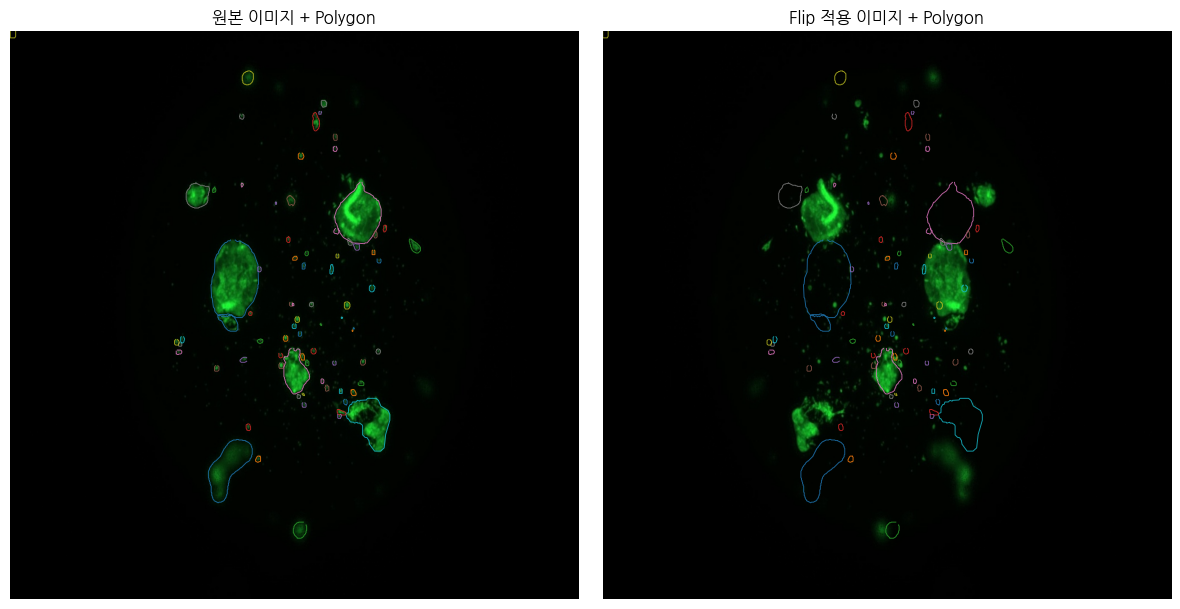

In [16]:
import cv2

# 1. 샘플 이미지와 annotation 가져오기
sample_image_info = coco["images"][1]
sample_image_path = os.path.join(img_dir, sample_image_info["file_name"])
sample_img = cv2.imread(sample_image_path)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)  # matplotlib 호환 위해

sample_image_id = sample_image_info["id"]
sample_anns = [ann for ann in coco["annotations"] if ann["image_id"] == sample_image_id]

# polygon만 사용 (segmentation이 polygon일 때만)
seg_polys = []
for ann in sample_anns:
    if isinstance(ann['segmentation'], list) and len(ann['segmentation']) > 0:
        seg_polys.extend(ann['segmentation'])

# annotation 여러개면 모두 flip되도록 리스트로 준비
polygons = seg_polys if seg_polys else []

height, width = sample_img.shape[:2]

# Albumentations transform 정의 및 적용 (좌우 flip + polygon에 적용)
transform = A.Compose(
    [
        A.HorizontalFlip(p=1.0)
    ],
    additional_targets={'polygons': 'polygons'}
)

# Albumentations expects polygons to be [[[x1, y1, ..., xn, yn]], ...] (COCO 양식), 
transformed = transform(
    image=sample_img,
    polygons=polygons
)
aug_img = transformed['image']
aug_polygons = transformed['polygons']

# 시각화 함수 (가느다란 선으로 폴리곤 표시)
def plot_img_with_polygon(ax, img, polygons, title):
    ax.imshow(img)
    for poly in polygons:
        pts = np.array(poly).reshape(-1,2)
        # linewidth 파라미터로 선을 가늘게, 마커 없앰
        ax.plot(pts[:,0], pts[:,1], '-', linewidth=0.7, alpha=0.8)
    ax.set_title(title)
    ax.axis('off')

# 1행 2열로 그림 그리기
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_img_with_polygon(axs[0], sample_img, polygons, "원본 이미지 + Polygon")
plot_img_with_polygon(axs[1], aug_img, aug_polygons, "Flip 적용 이미지 + Polygon")
plt.tight_layout()
plt.show()


In [19]:
import os
import json
from pprint import pprint

import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import cv2

img_dir = "/home/mbd1234/data/yolo_set_3/images/val"
ann_file = "/home/mbd1234/data/yolo_set_3/annotations/instances_val.json"

with open(ann_file, "r") as f:
    coco = json.load(f)

# 이미지 id → file_name 매핑
image_id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

print("샘플 이미지 file_name:", coco["images"][0]["file_name"])
print("샘플 이미지 id:", coco["images"][0]["id"])


샘플 이미지 file_name: Cell Image (732).jpg
샘플 이미지 id: 1


In [20]:
# 1. 샘플 이미지 하나 선택
sample_image_info = coco["images"][1]   # [0] 말고 [1] 쓰시고 있었으니 그대로 둠
sample_image_id = sample_image_info["id"]
sample_image_path = os.path.join(img_dir, sample_image_info["file_name"])

# 이미지 로딩 (RGB 변환)
sample_img = cv2.imread(sample_image_path)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# 2. 해당 이미지에 연결된 annotation들
sample_anns = [ann for ann in coco["annotations"] if ann["image_id"] == sample_image_id]

print("이 이미지에 붙은 annotation 개수:", len(sample_anns))
pprint(sample_anns[0])


이 이미지에 붙은 annotation 개수: 78
{'area': 9520.0,
 'bbox': [361.63, 376.69, 85.7, 139.7],
 'category_id': 1,
 'id': 249,
 'image_id': 2,
 'iscrowd': 0,
 'segmentation': [[396.67,
                   376.69,
                   396.13,
                   378.15,
                   392.35,
                   378.15,
                   389.66,
                   381.07,
                   387.5,
                   381.07,
                   381.04,
                   387.66,
                   375.11,
                   397.9,
                   375.11,
                   400.09,
                   371.87,
                   403.02,
                   368.64,
                   411.79,
                   368.1,
                   434.47,
                   363.79,
                   444.71,
                   362.71,
                   456.41,
                   361.63,
                   457.14,
                   362.71,
                   480.55,
                   363.79,
                   

In [21]:
# 이 이미지에 있는 모든 polygon들을 모을 리스트
polygons = []        # [np.ndarray(nx2), np.ndarray(mx2), ...]
poly_lengths = []    # 각 polygon이 몇 개의 점으로 되어 있는지 저장 (나중에 복원용)

for ann in sample_anns:
    seg = ann.get("segmentation", [])
    if isinstance(seg, list) and len(seg) > 0:
        # 한 annotation 안에 polygon이 여러 개 있을 수도 있으니 전부 순회
        for poly in seg:
            # poly: [x1, y1, x2, y2, ...] → [[x1, y1], [x2, y2], ...] 로 바꾸기
            pts = np.array(poly, dtype=np.float32).reshape(-1, 2)
            polygons.append(pts)
            poly_lengths.append(len(pts))

print("폴리곤 개수:", len(polygons))


폴리곤 개수: 78


In [22]:
# 모든 polygon의 vertex들을 하나의 keypoints로 모으기
keypoints = []  # [[x, y], [x, y], ...]
for pts in polygons:
    for p in pts:
        keypoints.append([float(p[0]), float(p[1])])

keypoints = np.array(keypoints, dtype=np.float32)
print("전체 keypoints 개수:", len(keypoints))  # = 모든 polygon vertex 총합


전체 keypoints 개수: 1369


In [23]:
transform = A.Compose(
    [
        A.HorizontalFlip(p=1.0),  # 항상 Flip (debug용)
    ],
    keypoint_params=A.KeypointParams(
        format='xy',              # (x, y) 순서
        remove_invisible=False    # 이미지 밖으로 나간 점도 그대로 보관
    )
)


In [24]:
# 변환 적용
transformed = transform(image=sample_img, keypoints=keypoints)
aug_img = transformed['image']
aug_keypoints = np.array(transformed['keypoints'], dtype=np.float32)

# 다시 polygon 단위로 나누기
aug_polygons = []
idx = 0
for L in poly_lengths:
    pts = aug_keypoints[idx:idx+L]
    aug_polygons.append(pts)
    idx += L

print("복원된 polygon 개수:", len(aug_polygons))


복원된 polygon 개수: 78


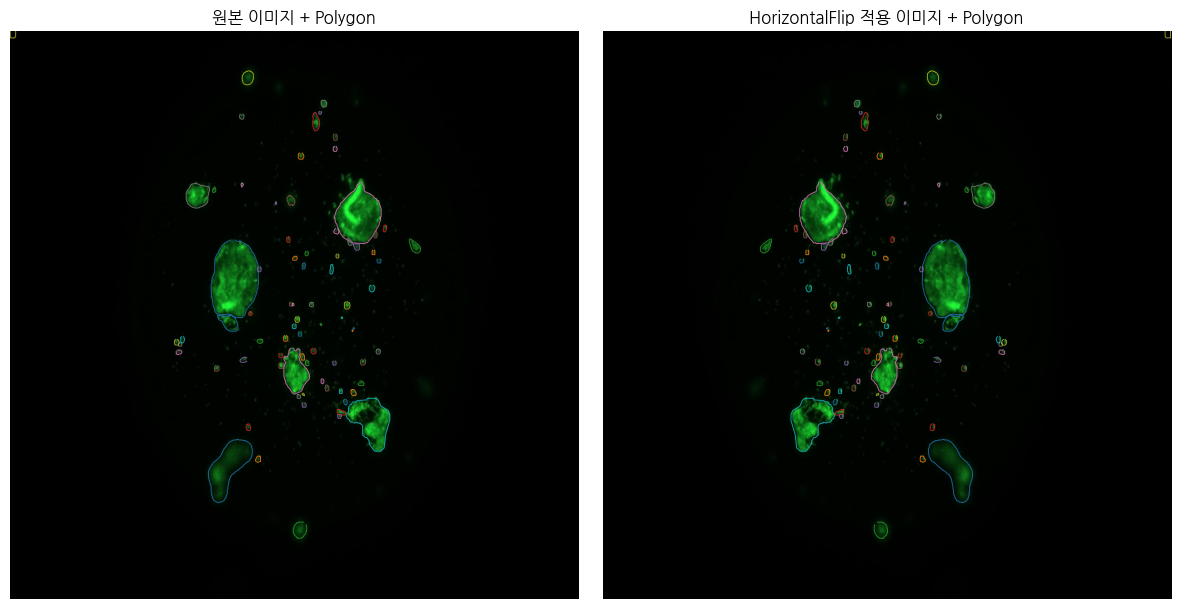

In [25]:
def plot_img_with_polygon(ax, img, polygons, title):
    ax.imshow(img)
    for pts in polygons:
        pts = np.asarray(pts)
        ax.plot(pts[:, 0], pts[:, 1], '-', linewidth=0.7, alpha=0.8)
    ax.set_title(title)
    ax.axis('off')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_img_with_polygon(axs[0], sample_img, polygons, "원본 이미지 + Polygon")
plot_img_with_polygon(axs[1], aug_img, aug_polygons, "HorizontalFlip 적용 이미지 + Polygon")
plt.tight_layout()
plt.show()
